https://www.kaggle.com/code/trnmtin/phobert-classification-for-vietnamese-text

https://github.com/suicao/PhoBert-Sentiment-Classification/tree/master

https://www.kaggle.com/code/biminhc/rating-classification-with-phobert

https://www.kaggle.com/code/phmanhth/phobert-classification

https://www.kaggle.com/search?q=phobert+in%3Anotebooks

## Load data

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
%cp '/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/Data/data_clean_4_class.pkl' '/content'

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', 200)

data = pd.read_pickle('/content/data_clean_4_class.pkl')
# data = data[data['Label'] != 'Undetermined']
data

,Content,Label
0,bắt_cóc trục_xuất đừng chánh_trị_gia giàu hứa nhân_đạo ký thương_ước quốc_gia tôn_trọng nhân_quyền đồng_bào trường_hợp nguyễn_quang hồng nhân trịnh thuý hạnh nhà_nước cộng_hoà liên_bang đức bắt ch...,False
1,dâm tặc viện phó đầu_sai vũ nhôm tràn_ngập báo mạng gọi hình buồn_nôn quyền_thế dâm tặc hưu địa_phương ngang_nhiên trò dâm_ô đồi_bại trẻ_em tưởng_tượng đương_chức trò đồi_bại làm_việc sinh_sống xả...,False
2,kỷ hợi dung_dưỡng tự_chủ dân_tộc v việt_nam chính_thức kỷ hợi âm_lịch việt ngô tiên_vương đánh_đuổi tan giặc nam hán nhà_nước việt_nam độc_lập chủ độc_lập tự_chủ xưng_vương kinh_đô cổ loa phong ch...,False
3,lật chiến thư chỉ_thị nguyễn thị kim_ngân cam_kết vành_đai đường ngân chân_thành bày_tỏ xu_nịnh hoàng_đế tập sắp_xếp kim_ngân leo tân_thái_thú hồn hoa xác việt tương_lai câu kinh_kệ quen_thuộc kế_...,False
4,màu cờ linh_hồn tổ_quốc bảo giang tự_do nhân_phẩm nhân_quyền công_dân luật_pháp bảo_vệ tôn_trọng công_dân coi tội tuyên_án bạo_hành cơ_quan trách_nhiệm xã_hội nhân_bản tiếng súng đùng chát phá làn...,False
...,...,...
1294,kiên_giang miễn_nhiệm đại_biểu hđnd hà văn phúc bị_cáo buộc tham_nhũng hà văn phúc nguyên giám_đốc sở y_tế kiên_giang miễn_nhiệm đại_biểu hđnd tỉnh kiên_giang kỳ họp hậu_quả sai_phạm nghiêm_trọng ...,True-w-false
1295,việt_nam tặng lào món quà một_triệu usd mua chuyến thăm chính_thức lào chủ_tịch võ văn thưởng tặng lào món quà trị_giá một_triệu usd củng_cố quan_hệ hữu_nghị vĩ_đại đoàn_kết hợp_tác toàn_diện việt...,True-w-false
1296,bốc_thăm tư_pháp xác_minh tài_sản thu_nhập tư_pháp tổ_chức bốc_thăm xác_minh tài_sản thu_nhập quy_định luật phòng_chống tham_nhũng hoạt_động thường_niên tư_pháp tăng_cường minh_bạch trách_nhiệm ch...,True-w-false
1297,thủ_tướng giorgia meloni đón trang_trọng chủ_tịch võ văn thưởng trao_đổi toàn_diện hợp_tác thống_nhất biện_pháp thực_chất tăng_cường quan_hệ thủ_tướng giorgia meloni tiềm_năng mở_rộng hợp_tác quyế...,True-w-false


In [ ]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data

,Content,Label
0,phó chủ_tịch võ thị ánh xuântôi mong_đợi movitel kỳ_tích phó chủ_tịch võ thị ánh xuân bày_tỏ ấn_tượng thành_công viettel mô_hình đầu_tư nước_ngoài mozambiquephó chủ_tịch võ thị ánh xuân làm_việc m...,True
1,vận_động ngân_hàng thương_mại lãi_suất phó thống_đốc nhnn cơ_quan vận_động ngân_hàng thương_mại lãi_suất doanh_nghiệp đẩy_mạnh tín_dụng nămchiều họp_báo chính_phủ thường_kỳ đại_diện ngân_hàng nhà_...,True
2,tài_liệu tố_giác nguyễn_chí vịnh giới_thiệu tài_liệu tố_giác trung_tá vũ trí tước quân_hàm sĩ_quan bbtwebvt— tổng cục ii nỗivũ trítôi quân đảng làm_việc tổng_cục ii quốc_phòng suy_giảm nghiêm_trọn...,False
3,việt bầu lãnh_đạo bang oregon mỹ hiện hạ_nghị_sĩ gốc việt hạ_viện bang oregon thẩm_phán gốc việt việt bầu lãnh_đạo oregon vị_thế việt mỹ chiều giờ_địa_phương thủ_tướng tiếp đoàn chính_trị_gia doan...,True-w-false
4,thủ_tướng đề_cao vai_trò asean thế_giới đa cực thủ_tướng dân_số đông sáng_kiến thúc_đẩy asean khả_năng đảm_nhận vị_thế cực thế_giới đa cực vnexpressthủ tướng dân_số đông sáng_kiến thúc_đẩy asean k...,True
...,...,...
1211,triển_khai loạt dự_án trọng_điểm địa_phương ỷ_lại trung_ương dân_trí thủ_tướng quán_triệt địa_phương vận_động cân_đối nguồn_lực vốn đầu_tư công_trình giao_thông trọng_điểm ỷ_lại trung_ương nội_dun...,True-w-false
1212,râu anh_hùng kế_hoạch phản_gián kế_hoạch kế_hoạch phản_gián quy_mô không_gian bố_trí lực_lượng đấu_tranh thắng_lợi giòn_giã đập_tan âm_mưu đánh chiếm chính_quyền lật_đổ chế_độ toán biệt_kích tổ_ch...,True-w-false
1213,lãnh_đạo quốc_gia tổ_chức quốc_tế chúc_mừng quốc_khánh việt_nam kỷ_niệm quốc_khánh cộng_hoà_xã_hội_chủ_nghĩa_việt_nam lãnh_đạo quốc_gia tổ_chức quốc_tế gửi chúc_mừng lãnh_đạo đảng nhà_nước việt_na...,True-w-false
1214,bộ_chính_trị quyết_định miễn_nhiệm bộ_trưởng tư_pháp lê_thành_long bộ_chính_trị quyết_định miễn_nhiệm bộ_trưởng tư_pháp lê_thành_long vụ tham_nhũng hoạt_động đấu_giá tài_sản nhà_nước thông_tin ban...,False-w-true


## Modeling

In [ ]:
!pip install transformers
!pip3 install tokenizers

In [ ]:
from transformers import TFAutoModel, AutoTokenizer

phobert_v2 = TFAutoModel.from_pretrained("vinai/phobert-base-v2", from_pt=True)
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

config.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

In [ ]:
embedding_weight = phobert_v2.roberta.embeddings.weight
embedding_weight.shape

<tf.Variable 'tf_roberta_model/roberta/embeddings/word_embeddings/weight:0' shape=(64001, 768) dtype=float32, numpy=
array([[ 0.03668083, -0.01310933, -0.05621772, ...,  0.00610615,
         0.00374597, -0.005094  ],
       [ 0.03593941,  0.01221203, -0.00065454, ...,  0.00138174,
        -0.00532538,  0.02219304],
       [ 0.02524041,  0.00677719, -0.00039954, ..., -0.01833021,
         0.03117767,  0.03614675],
       ...,
       [ 0.04034391, -0.05133145, -0.00254852, ..., -0.03552441,
        -0.0694323 ,  0.02042077],
       [ 0.05350328,  0.01569565, -0.00672157, ...,  0.0222424 ,
        -0.00605582,  0.00736773],
       [ 0.0360295 ,  0.00147466, -0.01450636, ...,  0.01040572,
        -0.00654617,  0.03683297]], dtype=float32)>

In [ ]:
phobert_v2.summary()

Model: "tf_roberta_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLaye  multiple                  134998272 
 r)                                                              
                                                                 
Total params: 134998272 (514.98 MB)
Trainable params: 134998272 (514.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Data preparation

In [ ]:
sentences = list(data['Content'])
labels = list(data['Label'])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
X_train[0]

'đà_lạt đe_doạ xoá_sổ lịch_sử dốt_nát tận_cùng giới lãnh_đạo hình đà_lạt mẫu tiến_trình công_nghiệp_hoá đô_thị_hoá sapa mẫu thành_công gs trần hữu dũng trang_điểm phẫn_nộ bày_tỏ lãnh_đạo ngu_dốt lãnh_đạo lâm_đồng hề ngu_dốt khôn_ngoan lựa_chọn cty cổ_phần đại quang_minh doanh_nghiệp trấn_giữ khoản đất vàng thủ thiêm phát_sinh dân oan loạt lãnh_đạo hầu bắt_tay doanh_nghiệp quy_hoạch thủ thiêm tức_là đại quang_minh lãnh_đạo lâm_đồng lựa_chọn doanh_nghiệp cáo_già thừa_thãi kinh_nghiệm bất_động_sản ổn_định chính_sách dòng tiền dồi_dào lãnh_đạo lâm_đồng tài_tình quyết_tâm chính_trị lớn_lao chấp_nhận rách_nát rạp hoà_bình biểu_tượng giới lãnh_đạo tỉnh đường_sắt răng_cưa thuỵ_sĩ giá phế_liệu vẽ dự_án phục_hồi ngàn tỷ đồng giới tinh_hoa tỉnh lâm_đồng tinh_thần chỉ_đạo thủ_tướng tiểu paris châu_á rõ_ràng nông_cạn đề_án tiểu paris châu_á đơn_thuần điền chỗ trống gỡ cũ_kỹ mảnh đất vàng kế_hoạch lợi_nhuận doanh_nghiệp việt_nam lố_lăng rác_rưởi hà_nội cạnh hồ gươm hàm cá_mập kiến_trúc thời chắp_vá 

In [ ]:
y_train[0]

'False-w-true'

In [ ]:
import tensorflow as tf
from tqdm.auto import tqdm
import numpy as np

def generate_data(X, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(X)):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [ ]:
# Define the input shape
max_length = 256

X_train_input_ids = np.zeros((len(X_train), max_length))
X_train_attn_masks = np.zeros((len(X_train), max_length))
X_train_input_ids, X_train_attn_masks = generate_data(X_train, X_train_input_ids, X_train_attn_masks, tokenizer)

X_test_input_ids = np.zeros((len(X_test), max_length))
X_test_attn_masks = np.zeros((len(X_test), max_length))
X_test_input_ids, X_test_attn_masks = generate_data(X_test, X_test_input_ids, X_test_attn_masks, tokenizer)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [ ]:
def label_encoder(labels):
    label_mapping = {'True':0, 'False': 1, 'True-w-false':2, 'False-w-true':3}
    return np.array([label_mapping[label] for label in labels])

In [ ]:
y_train = label_encoder(y_train)
y_test = label_encoder(y_test)

In [ ]:
num_classes = 4
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [ ]:
(y_train.shape, y_test.shape)

((972, 4), (244, 4))

In [ ]:
# creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading...
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_input_ids, X_train_attn_masks, y_train))
train_dataset.take(1) # one sample data

<_TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [ ]:
# creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading...
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_input_ids, X_test_attn_masks, y_test))
test_dataset.take(1) # one sample data

<_TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [ ]:
def SentimentDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [ ]:
train_dataset = train_dataset.map(SentimentDatasetMapFunction) # converting to required format for tensorflow dataset
train_dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.float64, name=None)}, TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [ ]:
test_dataset = test_dataset.map(SentimentDatasetMapFunction) # converting to required format for tensorflow dataset
test_dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.float64, name=None)}, TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [ ]:
batch_size = 16
train_dataset = train_dataset.shuffle(10000).batch(batch_size, drop_remainder=True)
train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
train_dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 4), dtype=tf.float64, name=None))>

In [ ]:
test_dataset = test_dataset.batch(batch_size, drop_remainder=True)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset.take(1)

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 4), dtype=tf.float64, name=None))>

#### Create model

In [ ]:
# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(max_length,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(max_length,), name='attention_mask', dtype='int32')

bert_embds = phobert_v2.roberta(input_ids, attention_mask=attn_masks)[0]
flatten = tf.keras.layers.Flatten()(bert_embds)
batch_normalize = tf.keras.layers.BatchNormalization()(flatten)
intermediate_layer = tf.keras.layers.Dense(64, activation='relu', name='intermediate_layer')(batch_normalize)
dropout_layer = tf.keras.layers.Dropout(0.2)(intermediate_layer)
output_layer = tf.keras.layers.Dense(num_classes, activation='softmax', name='output_layer')(dropout_layer) # softmax -> calcs probs of classes

model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)

model.get_layer('roberta').trainable = False
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 roberta (TFRobertaMainLaye  TFBaseModelOutputWithPooli   1349982   ['input_ids[0][0]',           
 r)                          ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 256, 7                                       

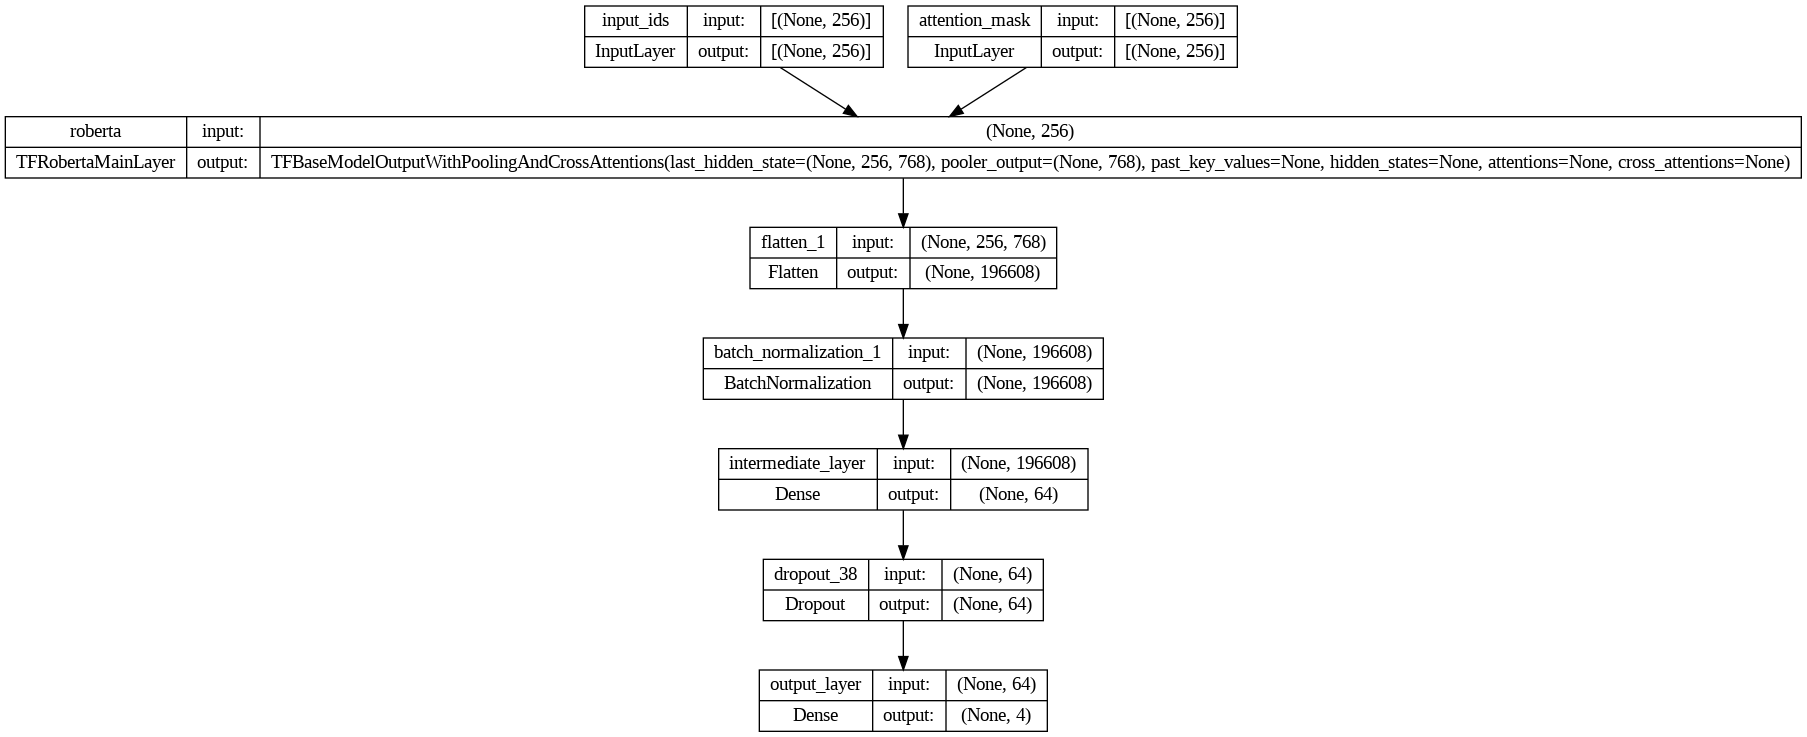

In [ ]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

#### Train model

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=1e-5, weight_decay=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

model.compile(optimizer=optim, loss=loss_func, metrics=[acc])
history = model.fit(train_dataset, epochs=50, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/50
60/60 [==============================] - 48s 390ms/step - loss: 1.4868 - accuracy: 0.4250 - val_loss: 0.9279 - val_accuracy: 0.6992
Epoch 2/50
60/60 [==============================] - 22s 365ms/step - loss: 0.7627 - accuracy: 0.7042 - val_loss: 0.7377 - val_accuracy: 0.8203
Epoch 3/50
60/60 [==============================] - 23s 384ms/step - loss: 0.3533 - accuracy: 0.8813 - val_loss: 0.6045 - val_accuracy: 0.8398
Epoch 4/50
60/60 [==============================] - 23s 377ms/step - loss: 0.1968 - accuracy: 0.9479 - val_loss: 0.5068 - val_accuracy: 0.8555
Epoch 5/50
60/60 [==============================] - 22s 374ms/step - loss: 0.1418 - accuracy: 0.9646 - val_loss: 0.4514 - val_accuracy: 0.8477
Epoch 6/50
60/60 [==============================] - 23s 378ms/step - loss: 0.0901 - accuracy: 0.9875 - val_loss: 0.4207 - val_accuracy: 0.8555
Epoch 7/50
60/60 [==============================] - 23s 385ms/step - loss: 0.0798 - accuracy: 0.9854 - val_loss: 0.4083 - val_accuracy: 0.8594

#### Result

(0.0, 1.560371427796781)

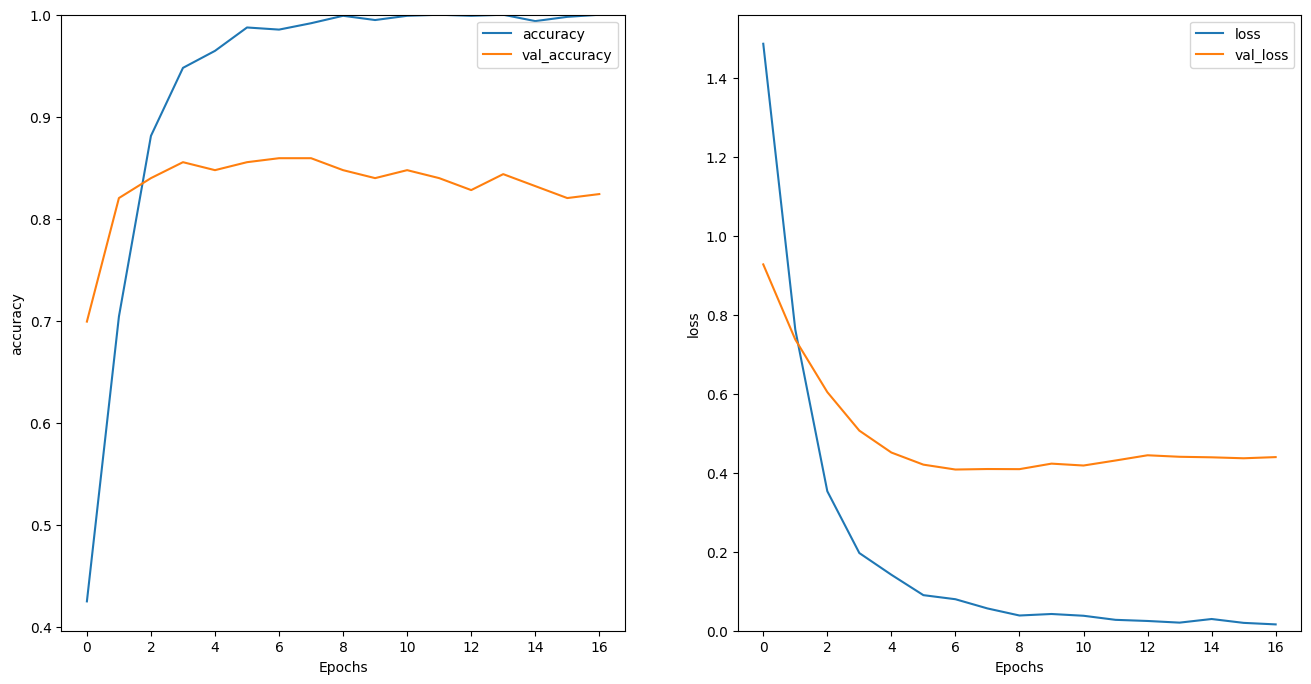

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Compute the labels from the normalized confusion matrix.
    labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
class_names = ['True', 'False', 'True-w-false', 'False-w-true']

In [ ]:
a = {'input_ids': X_test_input_ids, 'attention_mask': X_test_attn_masks}

8/8 [==============================] - 7s 506ms/step


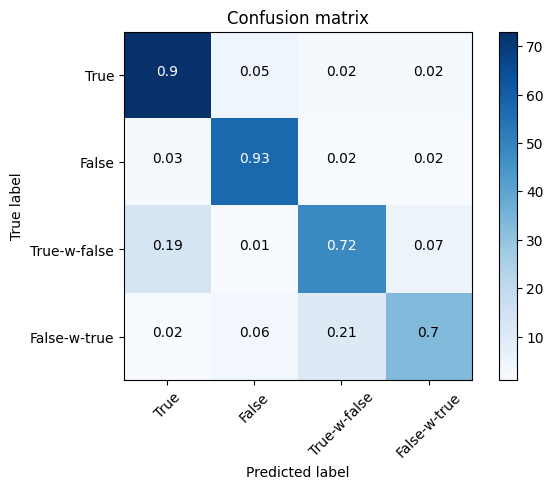

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(a)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plot_confusion_matrix(cm, class_names)

In [ ]:
b = {'input_ids': X_train_input_ids, 'attention_mask': X_train_attn_masks}

In [ ]:
from sklearn.metrics import classification_report

# Predict on the train set
y_pred = model.predict(b)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the classifier
print(classification_report(np.argmax(y_train, axis=1), y_pred))

30/30 [==============================] - 15s 518ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       227
           3       1.00      1.00      1.00       245

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [ ]:
from sklearn.metrics import classification_report

# Evaluate the classifier
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        81
           1       0.88      0.93      0.90        61
           2       0.79      0.72      0.75        67
           3       0.80      0.70      0.75        47

    accuracy                           0.82       256
   macro avg       0.82      0.81      0.82       256
weighted avg       0.82      0.82      0.82       256



#### Save model

In [ ]:
from tensorflow.keras.models import save_model

# Lưu mô hình
model.save("/content/MyDrive/MyDrive/Colab Notebooks/Fake news detection/model/PhoBert_4_class.h5")